<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/Analise_de_dados_Airbnb_Buenos_Aires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Análise dos Dados do Airbnb - *Buenos Aires*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Buenos Aires, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


**Como estou realizando uma abordagem inicial, utilizarei uma base de dados resumida, pois a versão completa abrange cerca de 106 atributos, o que acarretaria em um tratamento bem mais profundo do problema.**

In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/argentina/ciudad-aut%C3%B3noma-de-buenos-aires/buenos-aires/2023-12-26/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Condo in Buenos Aires · ★4.79 · 1 bedroom · 1 ...,42762,Candela,NaN,Palermo,-34.581840,-58.424150,Entire home/apt,96921.0,3,39,2023-11-30,0.28,1,298,6,NaN
1,14222,Rental unit in Palermo/Buenos Aires · ★4.77 · ...,87710233,María,NaN,Palermo,-34.586170,-58.410360,Entire home/apt,32123.0,7,114,2023-11-30,0.82,8,161,12,NaN
2,15074,Rental unit in Buenos Aires · 1 bedroom · 1 be...,59338,Monica,NaN,Nuñez,-34.538920,-58.465990,Private room,24230.0,29,0,NaN,NaN,1,0,0,NaN
3,16695,Loft in Buenos Aires · ★4.28 · 1 bedroom · 1 b...,64880,Elbio Mariano,NaN,Monserrat,-34.614390,-58.376110,Entire home/apt,40303.0,2,45,2019-11-30,0.29,9,0,0,NaN
4,20062,Rental unit in Buenos Aires · ★4.93 · 2 bedroo...,75891,Sergio Damian,NaN,Palermo,-34.581848,-58.441605,Entire home/apt,138876.0,2,303,2023-12-26,1.83,4,92,30,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

**O banco de dados do Airbnb traz informações amplas sobre o aluguel na cidade de Buenos Aires. É necessária uma análise cuidadosa dos dados para tirar conclusões sobre a situação imobiliária da cidade.**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:",df.shape[0])
print("Variáveis:",df.shape[1])

Entradas: 33490
Variáveis: 18


### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

É possível perceber que a coluna neighbourhood_group possui 100% de seus valores faltantes, assim como a variável license, que em quase sua totalidade é nula. As variáveis last_review e price possuem cerca de 18% de valores ausentes.

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending=False)


neighbourhood_group               100.000000
license                            98.668259
reviews_per_month                  18.217378
last_review                        18.217378
price                               2.932219
host_name                           0.029860
neighbourhood                       0.000000
latitude                            0.000000
longitude                           0.000000
room_type                           0.000000
name                                0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
host_id                             0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
number_of_reviews_ltm               0.000000
id                                  0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?**
Irei adicionar alguns histogramas para melhor compreensão da distribuição das variáveis.

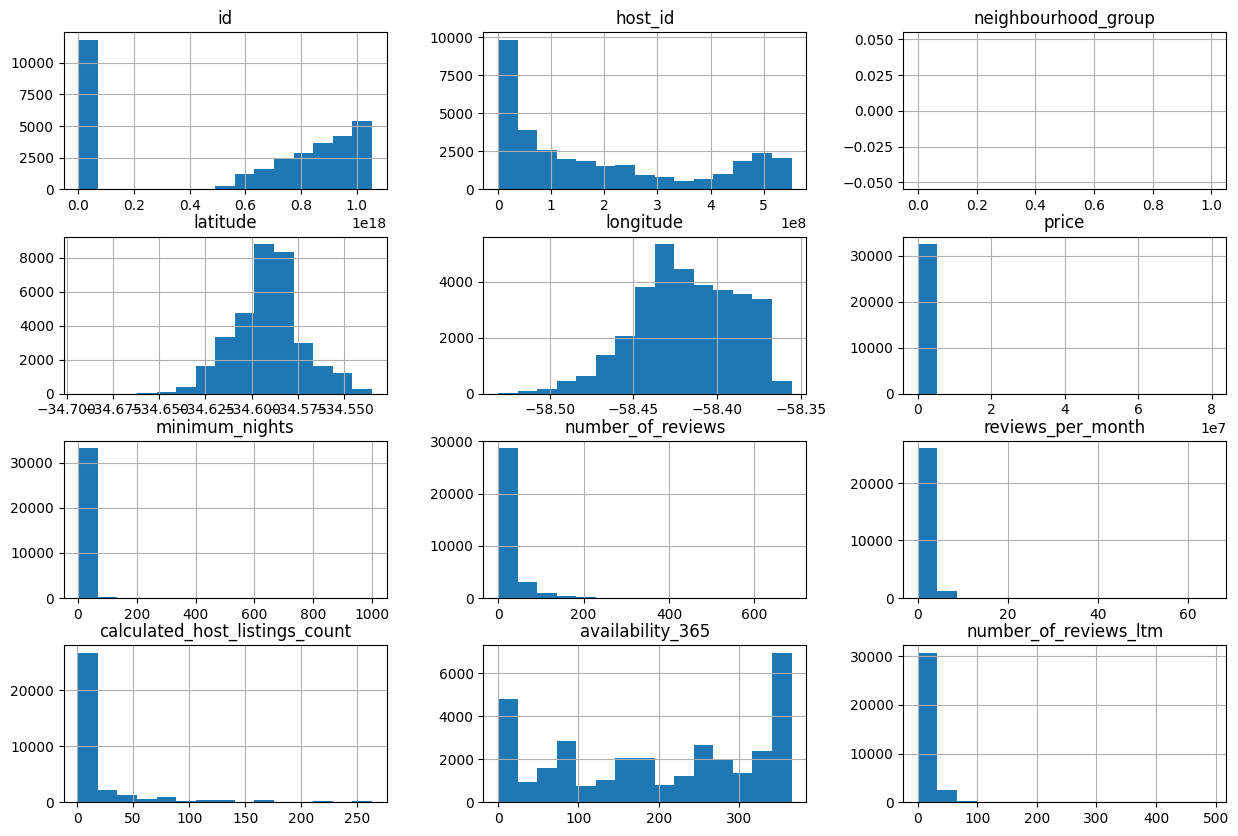

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


**Antes de iniciar nossa análise, é importante destacar que grandes bancos de dados podem conter outliers (valores destoantes que não condizem com a realidade). No caso em questão, existem imóveis listados com um mínimo de 1.000 noites para aluguel, além de alguns preços exorbitantes ou irrisórios. Sendo assim, é necessário um tratamento nesses dados para retirar os valores destoantes, que atrapalham a análise estatística.**

In [ ]:
df[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,3.250800e+04,33490.000000
mean,6.127636e+04,5.785608
std,7.049882e+05,23.603612
min,2.600000e+02,1.000000
25%,2.353900e+04,2.000000
50%,3.224200e+04,3.000000
75%,4.846000e+04,4.000000
max,7.995942e+07,1000.000000


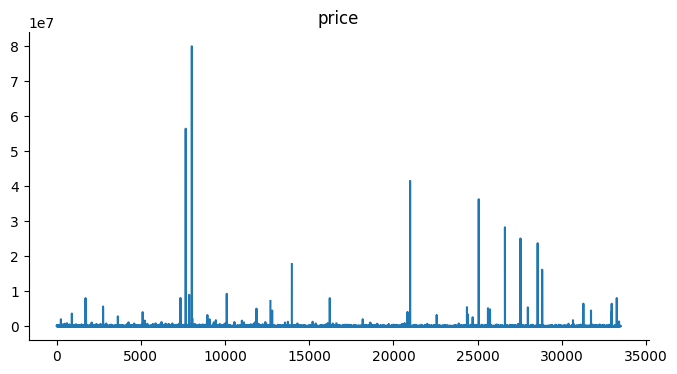

In [ ]:
from matplotlib import pyplot as plt
df['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

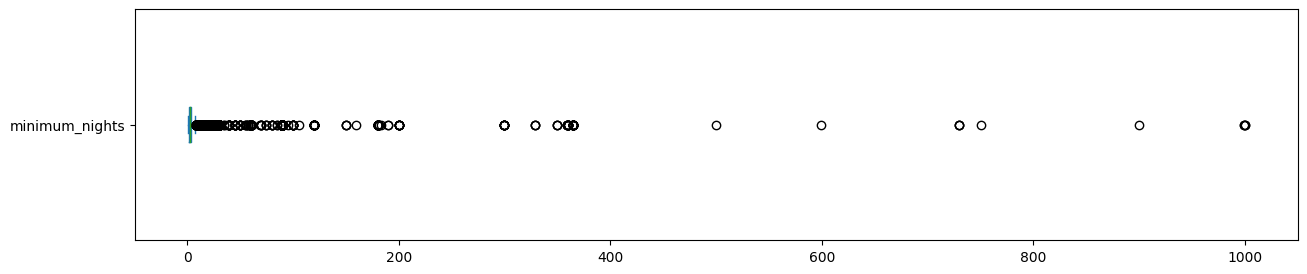

minimum_nights: valores acima de 40:
425 entradas
1.2690%


In [ ]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# ver quantidade de valores acima de 40 dias para minimum_nights
print("minimum_nights: valores acima de 40:")
print("{} entradas".format(len(df[df.minimum_nights > 40])))
print("{:.4f}%".format((len(df[df.minimum_nights > 40]) / df.shape[0])*100))

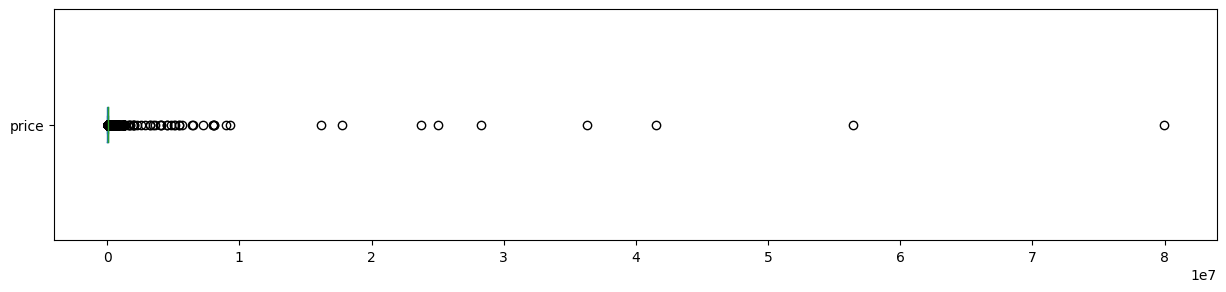


price: valores acima de 250.000 pesos
414 entradas
1.2362%


In [ ]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

# ver quantidade de valores acima de 1500 para price
print("\nprice: valores acima de 250.000 pesos")
print("{} entradas".format(len(df[df.price > 250000])))
print("{:.4f}%".format((len(df[df.price > 250000]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

**Já que identificamos outliers nas variáveis price e minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma**

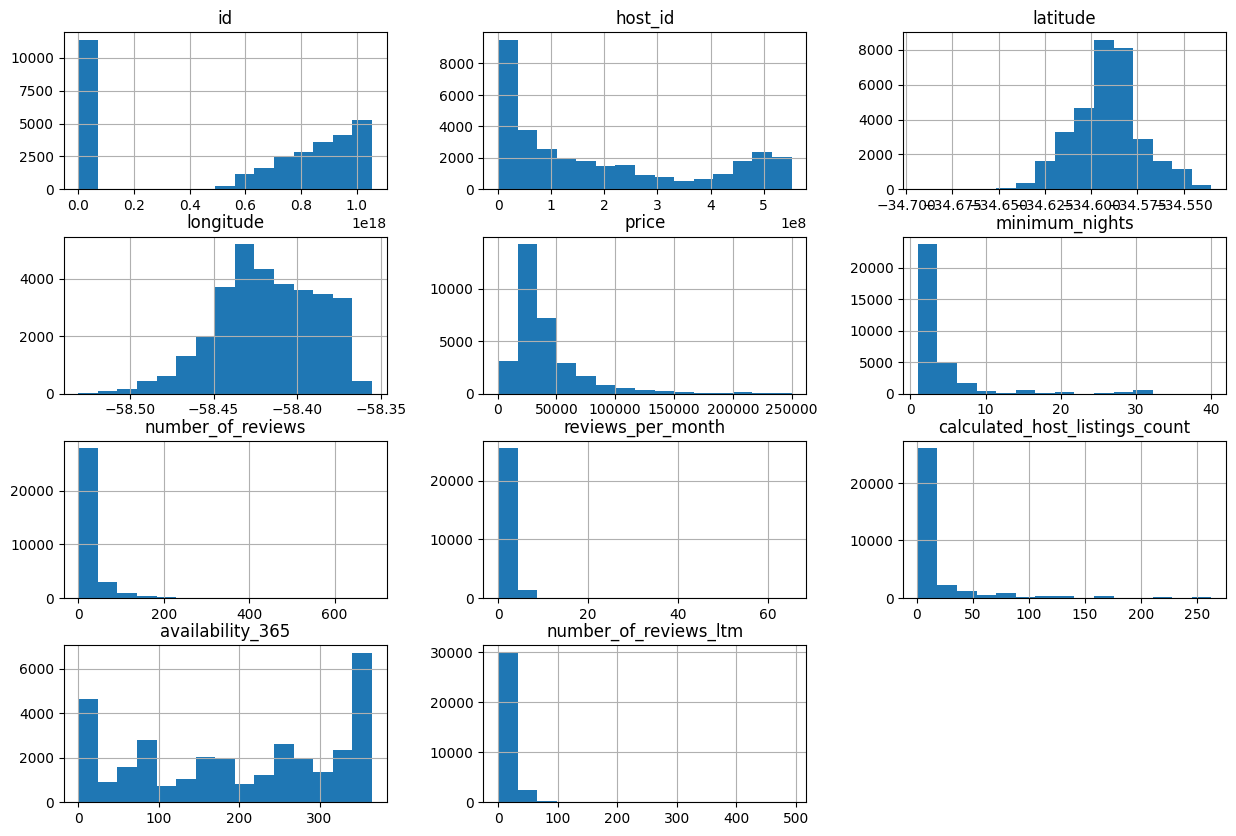

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 250000].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 40].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**
**Agora, com os dados devidamente tratados, iniciaremos nossas análises de forma analítica, utilizando a estatística.**

In [ ]:
# Media dos precos de aluguel
df_clean.price.mean()

41774.19004068246

**O preço médio de uma diária em Buenos Aires está em cerca de 41774 pesos, algo perto de 245 reais na cotação de fevereiro de 2024.**

### **Q5. Qual a correlação existente entre as variáveis**

**Estamos buscando aqui relações de similaridade ou causa e efeito entre duas variáveis, algo muito importante no método científico estatístico.
Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:**

**Criar uma matriz de correlação;**

**Gerar um heatmap a partir dessa matriz, usando a biblioteca seaborn**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.023030,0.017550,-0.055232,0.113887,0.030730
minimum_nights,-0.023030,1.000000,-0.101826,-0.247373,-0.035369,-0.015860
number_of_reviews,0.017550,-0.101826,1.000000,0.293613,-0.012533,-0.027052
reviews_per_month,-0.055232,-0.247373,0.293613,1.000000,0.067966,-0.053059
calculated_host_listings_count,0.113887,-0.035369,-0.012533,0.067966,1.000000,0.096672
availability_365,0.030730,-0.015860,-0.027052,-0.053059,0.096672,1.000000


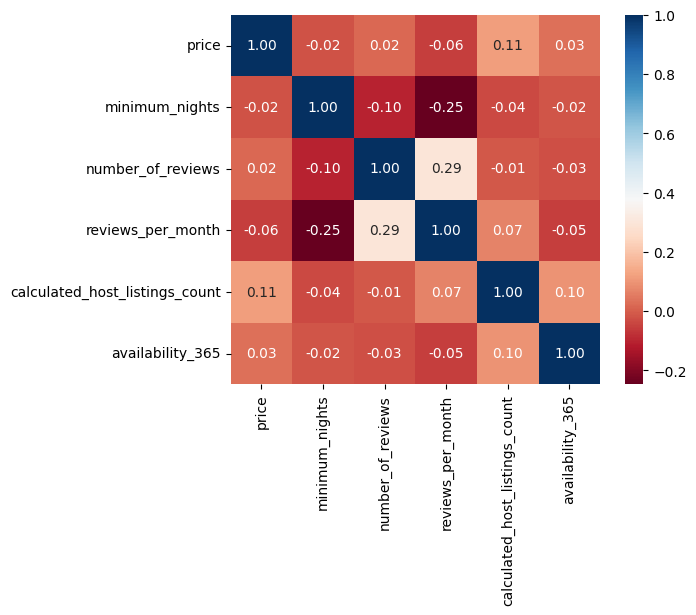

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb?**
**Se você tem familiaridade com a plataforma, sabe que existem vários tipos de imóveis para locação, como apartamentos, quartos, casas etc. A variável room_type contém todos esses dados. Chamaremos a função value_counts() para contar a quantidade de ocorrências de cada um dos tipos de aluguel.**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    29693
Private room        2670
Shared room          216
Hotel room            83
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() * 100 / df_clean.shape[0]

Entire home/apt    90.909926
Private room        8.174637
Shared room         0.661319
Hotel room          0.254118
Name: room_type, dtype: float64

### **Q7. Qual a localidade mais cara do dataset?**
**Uma forma de analisar a relação entre duas variáveis é usando o método groupby(). Aqui, queremos comparar os bairros (neighbourhoods) com base no preço de aluguel.**


In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Puerto Madero    99183.875000
Palermo          48576.370191
Villa Real       48358.285714
Retiro           45667.093396
Recoleta         44724.301274
Colegiales       42865.667610
Belgrano         40729.725217
Barracas         40640.689076
Nuñez            40569.208683
San Telmo        38426.553738
Name: price, dtype: float64

**Percebemos que a região de Puerto Madero é, de forma disparada, a mais valorizada, com uma diária média próxima de 590 reais. Isso se deve muito à sua localização privilegiada, com restaurantes e paisagens luxuosas.**



In [ ]:
from IPython.display import Image


image_url = "https://as1.ftcdn.net/v2/jpg/03/45/99/76/1000_F_345997614_k1quFmx1bvksvdnO08g3tS6kK5IC3szd.jpg"


Image(url=image_url) # %% [markdown] hide


**Como as latitudes e longitudes são fornecidas para os imóveis, é possível plotar cada ponto em um mapa. Para isso, considera-se x = longitude e y = latitude. Os preços estão representados pelas cores, conforme mostra a legenda à direita.**

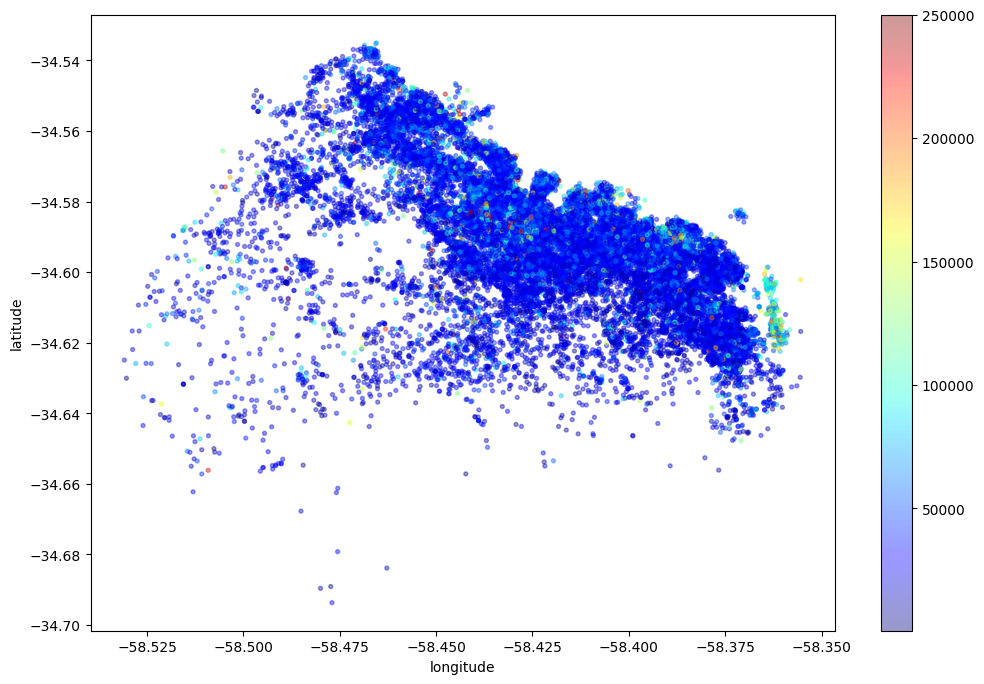

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean["minimum_nights"].mean()

3.953493356193742

## Conclusões


**Apesar de ser uma análise básica e um tanto superficial, foi possível tirar algumas conclusões com base na extração obtida. É importante ressaltar também que a presença de outliers comprometeria bastante nossa análise, sendo assim, foi imprescindível a retirada dos mesmos.**

**Tenha em mente tambem que este conjunto de dados é uma versão condensada, adequada apenas para uma abordagem preliminar. Sugere-se que, em uma futura análise exploratória, seja utilizado o conjunto de dados completo, com os 106 atributos disponíveis.**
